<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Unsupervised%20Learning/Unsupervised%20Learning%20in%20Python/4%20Discovering%20interpretable%20features/4_Discovering_interpretable_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering interpretable features

In this chapter, you'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

# 1. Non-negative matrix factorization (NMF)

2. Non-negative matrix factorization
NMF stands for "non-negative matrix factorization". NMF, like PCA, is a dimension reduction technique. In constract to PCA, however, NMF models are interpretable. This means an NMF models are easier to understand yourself, and much easier for you to explain to others. NMF can not be applied to every dataset, however. It is required that the sample features be "non-negative", so greater than or equal to 0.

3. Interpretable parts
NMF achieves its interpretability by decomposing samples as sums of their parts. For example, NMF decomposes documents as combinations of common themes,

4. Interpretable parts
and images as combinations of common patterns. You'll learn about both these examples in detail later. For now, let's focus on getting started.

5. Using scikit-learn NMF
NMF is available in scikit learn, and follows the same fit/transform pattern as PCA. However, unlike PCA, the desired number of components must always be specified. NMF works both with numpy arrays and sparse arrays in the csr_matrix format.

6. Example word-frequency array
Let's see an application of NMF to a toy example of a word-frequency array. In this toy dataset, there are only 4 words in the vocabulary, and these correspond to the four columns of the word-frequency array. Each row represents a document, and the entries of the array measure the frequency of each word in the document using what's known as "tf-idf". "tf" is the frequency of the word in the document. So if 10% of the words in the document are "datacamp", then the tf of "datacamp" for that document is point-1. "idf" is a weighting scheme that reduces the influence of frequent words like "the".

7. Example usage of NMF
Let's now see how to use NMF in Python. Firstly, import NMF. Create a model, specifying the desired number of components. Let's specify 2. Fit the model to the samples, then use the fit model to perform the transformation.

8. NMF components
Just as PCA has principal components, NMF has components which it learns from the samples, and as with PCA, the dimension of the components is the same as the dimension of the samples. In our example, for instance, there are 2 components, and they live in 4 dimensional space, corresponding to the 4 words in the vocabulary. The entries of the NMF components are always non-negative.

9. NMF features
The NMF feature values are non-negative, as well. As we saw with PCA, our transformed data in this example will have two columns, corresponding to our two new features. The features and the components of an NMF model can be combined to approximately reconstruct the original data samples.

10. Reconstruction of a sample
Let's see how this works with a single data sample. Here is a sample representing a document from our toy dataset, and here are its NMF feature values. Now if we multiply each NMF components by the corresponding NMF feature value, and add up each column, we get something very close to the original sample.

11. Sample reconstruction
So a sample can be reconstructed by multiplying the NMF components by the NMF feature values of the sample, and adding up. This calculation also can be expressed as what is known as a product of matrices. We won't be using that point of view, but that's where the "matrix factorization", or "MF", in NMF comes from.

12. NMF fits to non-negative data only
Finally, remember that NMF can only be applied to arrays of non-negative data, such as word-frequency arrays. In the next video, you'll construct another example by encoding collections of images as non-negative arrays. There are many other great examples as well, such as arrays encoding audio spectrograms, and arrays representing the purchase histories on e-Commerce sites.

13. Let's practice!
In this video, you've learned the basics of NMF. Now let's practice using it.

# Non-negative data

Which of the following 2-dimensional arrays are examples of non-negative data?

1. A tf-idf word-frequency array.

2. An array daily stock market price movements (up and down), where each row represents a company.

3. An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has purchased a product.

Wrong Answers

- 1 only

- 2 and 3

Correct Answer

- 1 and 3
 - Well done! Stock prices can go down as well as up, so an array of daily stock market price movements is not an example of non-negative data.



# NMF applied to Wikipedia articles

In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

Instructions

1. Import NMF from sklearn.decomposition.

2. Create an NMF instance called model with 6 components.

3. Fit the model to the word count data articles.

4. Use the .transform() method of model to transform articles, and assign the result to nmf_features.

5. Print nmf_features to get a first idea what it looks like (.round(2) rounds the entries to 2 decimal places.)

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

'''
<script.py> output:
    [[0.   0.   0.   0.   0.   0.44]
     [0.   0.   0.   0.   0.   0.57]
     [0.   0.   0.   0.   0.   0.4 ]
     [0.   0.   0.   0.   0.   0.38]
     [0.   0.   0.   0.   0.   0.49]
     [0.01 0.01 0.01 0.03 0.   0.33]
     [0.   0.   0.02 0.   0.01 0.36]
     [0.   0.   0.   0.   0.   0.49]
     [0.02 0.01 0.   0.02 0.03 0.48]
     [0.01 0.03 0.03 0.07 0.02 0.34]
     [0.   0.   0.53 0.   0.03 0.  ]
     [0.   0.   0.36 0.   0.   0.  ]
     [0.01 0.01 0.31 0.06 0.01 0.02]
     [0.   0.01 0.34 0.01 0.   0.  ]
     [0.   0.   0.43 0.   0.04 0.  ]
     [0.   0.   0.48 0.   0.   0.  ]
     [0.01 0.02 0.38 0.03 0.   0.01]
     [0.   0.   0.48 0.   0.   0.  ]
     [0.   0.01 0.55 0.   0.   0.  ]
     [0.   0.   0.47 0.   0.   0.  ]
     [0.   0.01 0.02 0.52 0.06 0.01]
     [0.   0.   0.   0.51 0.   0.  ]
     [0.   0.01 0.   0.42 0.   0.  ]
     [0.   0.   0.   0.44 0.   0.  ]
     [0.   0.   0.   0.5  0.   0.  ]
     [0.1  0.09 0.   0.38 0.   0.01]
     [0.   0.   0.   0.57 0.   0.01]
     [0.01 0.01 0.   0.47 0.   0.01]
     [0.   0.   0.   0.58 0.   0.  ]
     [0.   0.   0.   0.53 0.01 0.01]
     [0.   0.41 0.   0.   0.   0.  ]
     [0.   0.61 0.   0.01 0.   0.  ]
     [0.01 0.26 0.   0.02 0.01 0.  ]
     [0.   0.64 0.   0.   0.   0.  ]
     [0.   0.61 0.   0.   0.   0.  ]
     [0.   0.34 0.   0.   0.   0.  ]
     [0.01 0.32 0.02 0.   0.01 0.  ]
     [0.01 0.21 0.01 0.05 0.02 0.01]
     [0.01 0.47 0.   0.02 0.   0.  ]
     [0.   0.64 0.   0.   0.   0.  ]
     [0.   0.   0.   0.   0.48 0.  ]
     [0.   0.   0.   0.   0.49 0.  ]
     [0.   0.   0.   0.   0.38 0.01]
     [0.   0.   0.   0.01 0.54 0.  ]
     [0.   0.   0.01 0.   0.42 0.  ]
     [0.   0.   0.   0.   0.51 0.  ]
     [0.   0.   0.   0.   0.37 0.  ]
     [0.   0.   0.04 0.   0.23 0.  ]
     [0.01 0.   0.02 0.01 0.33 0.04]
     [0.   0.   0.   0.   0.42 0.  ]
     [0.31 0.   0.   0.   0.   0.  ]
     [0.37 0.   0.   0.   0.   0.  ]
     [0.4  0.03 0.   0.02 0.   0.02]
     [0.38 0.   0.   0.04 0.   0.01]
     [0.44 0.   0.   0.   0.   0.  ]
     [0.46 0.   0.   0.   0.   0.  ]
     [0.28 0.   0.   0.05 0.   0.02]
     [0.45 0.   0.   0.   0.01 0.  ]
     [0.29 0.01 0.01 0.01 0.19 0.01]
     [0.38 0.01 0.   0.1  0.01 0.  ]]
'''
'''
Fantastic - let's explore the meaning of these features in the next exercise!
'''

# NMF features of the Wikipedia articles

Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

Instructions

1. Import pandas as pd.

2. Create a DataFrame df from nmf_features using pd.DataFrame(). Set the index to titles using index=titles.

3. Use the .loc[] accessor of df to select the row with title 'Anne Hathaway', and print the result. These are the NMF features for the article about the actress Anne Hathaway.

4. Repeat the last step for 'Denzel Washington' (another actor).

In [ ]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

'''
<script.py> output:
    0    0.003845
    1    0.000000
    2    0.000000
    3    0.575711
    4    0.000000
    5    0.000000
    Name: Anne Hathaway, dtype: float64
    0    0.000000
    1    0.005601
    2    0.000000
    3    0.422380
    4    0.000000
    5    0.000000
    Name: Denzel Washington, dtype: float64
'''

**Conclusion**

Great work! Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

# NMF reconstructs samples

In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values. Below are the components of an NMF model:

`[[1.  0.5 0. ]`

`[0.2 0.1 2.1]]`

If the NMF feature values of a sample are [2, 1], then which of the following is most likely to represent the original sample? A pen and paper will help here! You have to apply the same technique Ben used in the video to reconstruct the sample [0.1203 0.1764 0.3195 0.141].

Wrong Answers

[0.5, 1.6, 3.1].

[-4.0, 1.0, -2.0].

Correct Answer

[2.2, 1.1, 2.1].



# 1. NMF learns interpretable parts
In this video, you'll learn that the components of NMF represent patterns that frequently occur in the samples.

2. Example: NMF learns interpretable parts
Let's consider a concrete example, where scientific articles are represented by their word frequencies. There are 20000 articles, and 800 words. So the array has 800 columns.

3. Applying NMF to the articles
Let's fit an NMF model with 10 components to the articles. The 10 components are stored as the 10 rows of a 2-dimensional numpy array.

4. NMF components are topics
The rows, or components, live in an 800-dimensional space - there is one dimension for each of the words. Aligning the words of our vocabulary with the columns of the NMF components allows them to be interpreted.

5. NMF components are topics
Choosing a component, such as this one, and looking at which words have the highest values,

6. NMF components are topics
we see that they fit a theme: the words are 'species', 'plant', 'plants', 'genetic', 'evolution' and 'life'.

7. NMF components are topics
The same happens if any other component is considered.

8. NMF components
So if NMF is applied to documents, then the components correspond to topics, and the NMF features reconstruct the documents from the topics. If NMF is applied to a collection of images, on the other hand, then the NMF components represent patterns that frequently occur in the images. In this example, for instance, NMF decomposes images from an LCD display into the individual cells of the display. This example you'll investigate for yourself in the exercises. To do this, you'll need to know how to represent a collection of images as a non-negative array.

9. Grayscale images
An image in which all the pixels are shades of gray ranging from black to white is called a "grayscale image". Since there are only shades of grey, a grayscale image can be encoded by the brightness of every pixel. Representing the brightness as a number between 0 and 1, where 0 is totally black and 1 is totally white, the image can be represented as 2-dimensional array of numbers.

10. Grayscale image example
Here, for example, is a grayscale photo of the moon!

11. Grayscale images as flat arrays
These 2-dimensional arrays of numbers can then be flattened by enumerating the entries. For instance, we could read-off the values row-by-row, from left-to-right and top to bottom.

12. Grayscale images as flat arrays
The grayscale image is now represented by a flat array of non-negative numbers.

13. Encoding a collection of images
A collection of grayscale images of the same size can thus be encoded as a 2-dimensional array, in which each row represents an image as a flattened array, and each column represents a pixel. Viewing the images as samples, and the pixels as features, we see that the data is arranged similarly to the word frequency array. Indeed, the entries of this array are non-negative, so NMF can be used to learn the parts of the images.

14. Visualizing samples
It's difficult to visualize an image by just looking at the flattened array. To recover the image, use the reshape method of the sample, specifying the dimensions of the original image as a tuple. This yields the 2-dimensional array of pixel brightnesses. To display the corresponding image, import pyplot, and pass the 2-dimensional array to the plt dot imshow function.

15. Let's practice!
In this video, you've seen how NMF components can be intepreted as patterns that frequently occur in the samples. It's time to get some practice and investigate this phenomenon for yourself.

# NMF learns topics of documents

In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

Instructions

1. Import pandas as pd.

2. Create a DataFrame components_df from model.components_, setting columns=words so that columns are labeled by the words.

3. Print components_df.shape to check the dimensions of the DataFrame.

4. Use the .iloc[] accessor on the DataFrame components_df to select row 3. Assign the result to component.

5. Call the .nlargest() method of component, and print the result. This gives the five words with the highest values for that component.

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())

'''
<script.py> output:
    (6, 13125)
    film       0.627877
    award      0.253131
    starred    0.245284
    role       0.211451
    actress    0.186398
    Name: 3, dtype: float64
'''

**Conclusion**

Great work! Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!

# Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

Instructions

1. Import matplotlib.pyplot as plt.

2. Select row 0 of samples and assign the result to digit. For example, to select column 2 of an array a, you could use a[:,2]. Remember that since samples is a NumPy array, you can't use the .loc[] or iloc[] accessors to select specific rows or columns.

3. Print digit. This has been done for you. Notice that it is a 1D array of 0s and 1s.

4. Use the .reshape() method of digit to get a 2D array with shape (13, 8). Assign the result to bitmap.

5. Print bitmap, and notice that the 1s show the digit 7!

6. Use the plt.imshow() function to display bitmap as an image.

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()
'''
<script.py> output:
    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
     0. 0. 0. 0. 0. 0. 0. 0.]
     
    [[0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 1. 1. 1. 1. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]]
'''

**Conclusion**

Excellent job! You'll explore this dataset further in the next exercise and see for yourself how NMF can learn the parts of images.
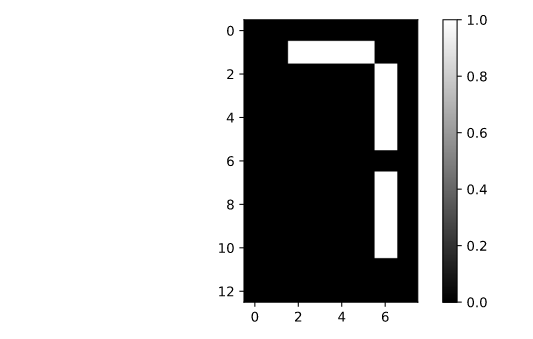

# NMF learns the parts of images

Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

`def show_as_image(sample):`    
    
    `bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()`

After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

Instructions

1. Import NMF from sklearn.decomposition.

2. Create an NMF instance called model with 7 components. (7 is the number of cells in an LED display).

3. Apply the .fit_transform() method of model to samples. Assign the result to features.

4. To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.

5. Assign the row 0 of features to digit_features.

6. Print digit_features.

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

'''
<script.py> output:
    [4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
     4.81559442e-01 0.00000000e+00 7.37557191e-16]
'''

**Conclusion**

Great work! Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

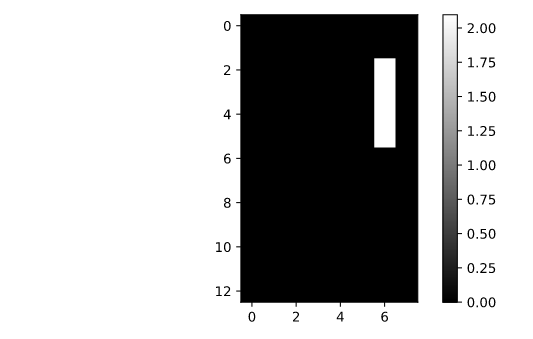

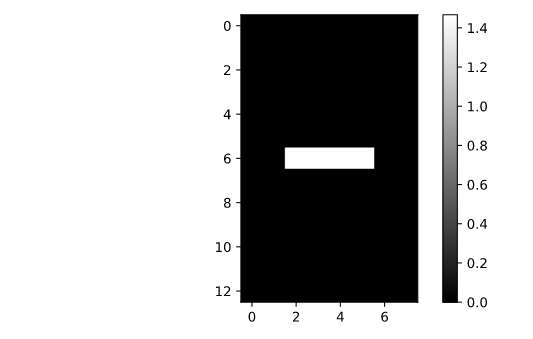

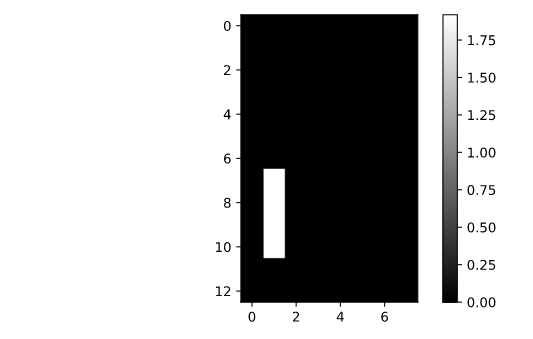

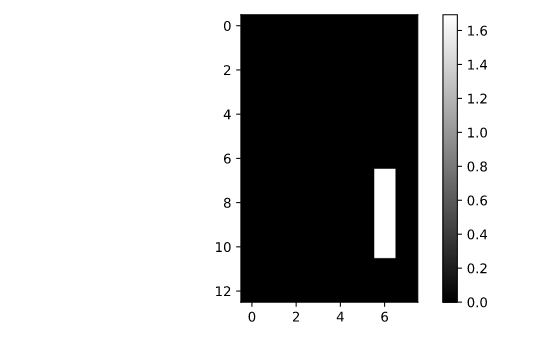

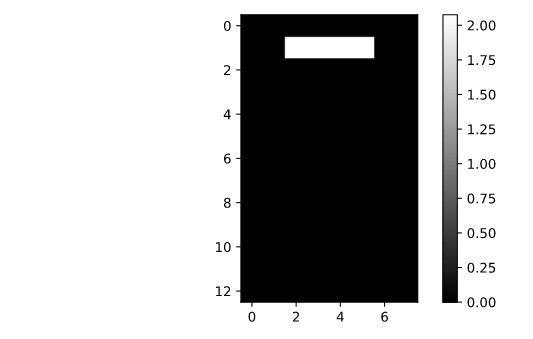

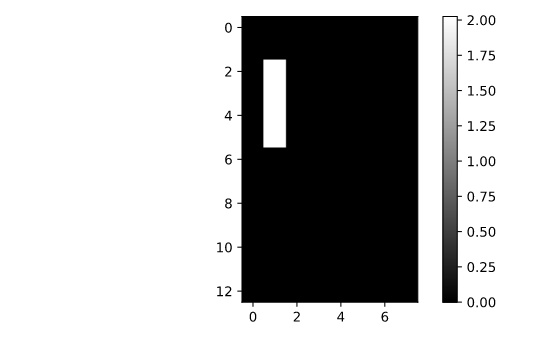

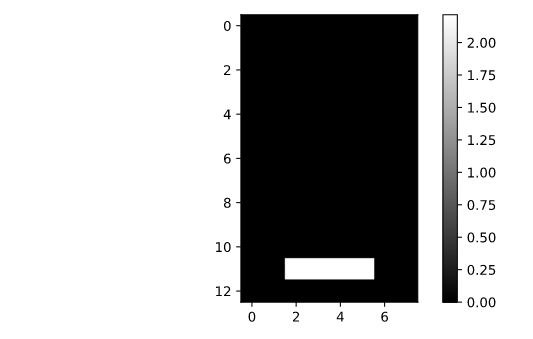

# PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

Instructions

1. Import PCA from sklearn.decomposition.

2. Create a PCA instance called model with 7 components.

3. Apply the .fit_transform() method of model to samples. Assign the result to features.

4. To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

**Conclusion**

Great work! Notice that the components of PCA do not represent meaningful parts of images of LED digits!

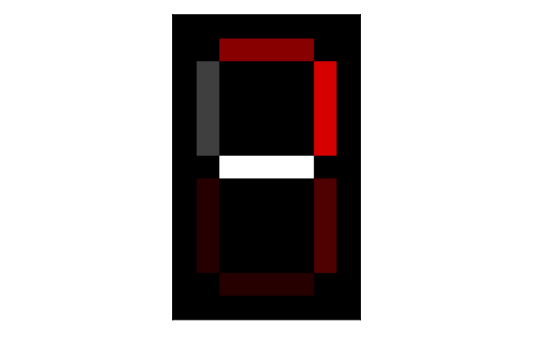

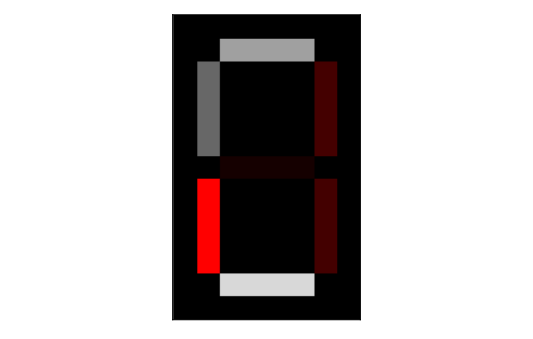

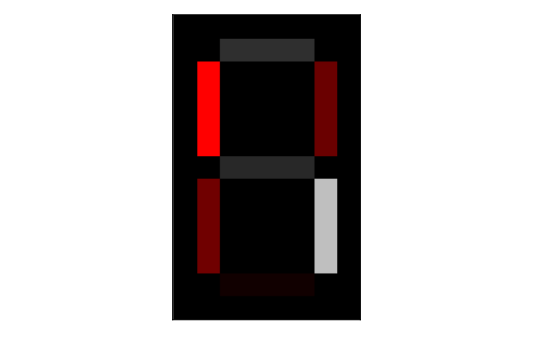

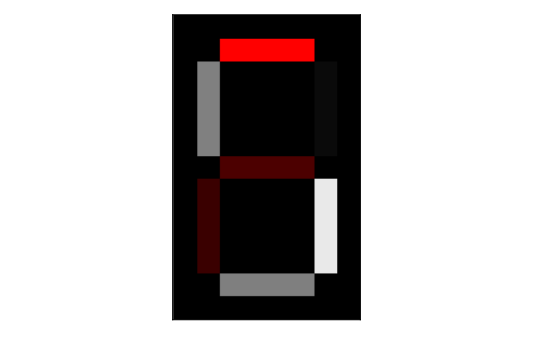

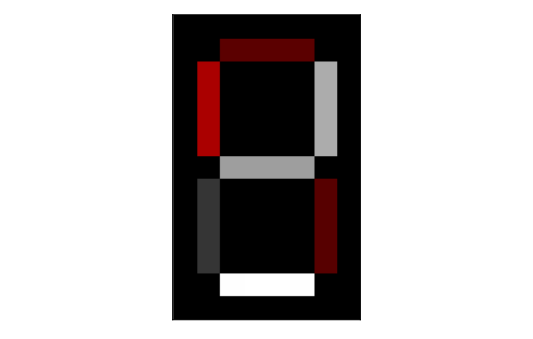

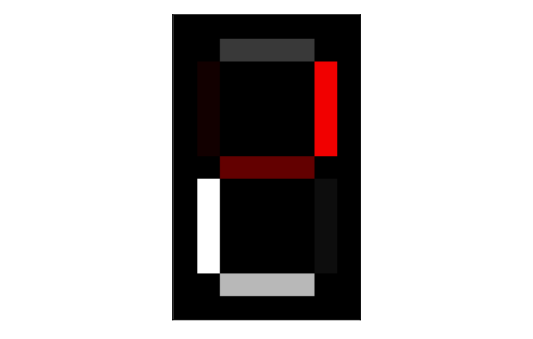

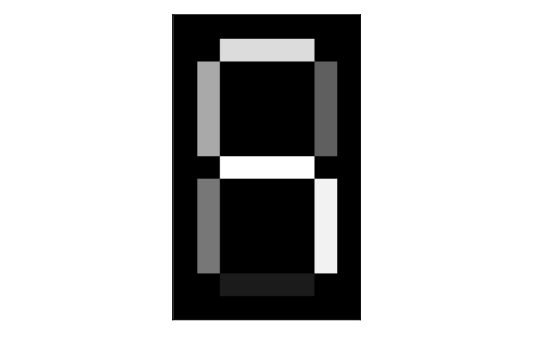

# 1. Building recommender systems using NMF

2. Finding similar articles
Suppose that you are an engineer at a large online newspaper. You've been given the task of recommending articles that are similar to the article currently being read by a customer. Given an article, how can you find articles that have similar topics? In this video, you'll learn how to solve this problem, and others like it, by using NMF.

3. Strategy
Our strategy for solving this problem is to apply NMF to the word-frequency array of the articles, and to use the resulting NMF features. You learned in the previous videos these NMF features describe the topic mixture of an article. So similar articles will have similar NMF features. But how can two articles be compared using their NMF features? Before answering this question, let's set the scene by doing the first step.

4. Apply NMF to the word-frequency array
You are given a word frequency array articles corresponding to the collection of newspaper articles in question. Import NMF, create the model, and use the fit_transform method to obtain the transformed articles. Now we've got NMF features for every article, given by the columns of the new array.

5. Strategy
Now we need to define how to compare articles using their NMF features.

6. Versions of articles
Similar documents have similar topics, but it isn't always the case that the NMF feature values are exactly the same. For instance, one version of a document might use very direct language,

7. Versions of articles
whereas other versions might interleave the same content with meaningless chatter. Meaningless chatter reduces the frequency of the topic words overall, which reduces the values of the NMF features representing the topics.

8. Versions of articles
However, on a scatter plot of the NMF features, all these versions lie on a single line passing through the origin.

9. Cosine similarity
For this reason, when comparing two documents, it's a good idea to compare these lines. We'll compare them using what is known as the cosine similarity, which uses the angle between the two lines. Higher values indicate greater similarity. The technical definition of the cosine similarity is out the scope of this course, but we've already gained an intuition.

10. Calculating the cosine similarities
Let's see now how to compute the cosine similarity. Firstly, import the normalize function, and apply it to the array of all NMF features. Now select the row corresponding to the current article, and pass it to the dot method of the array of all normalized features. This results in the cosine similarities.

11. DataFrames and labels
With the help of a pandas DataFrame, we can label the similarities with the article titles. Start by importing pandas. After normalizing the NMF features, create a DataFrame whose rows are the normalized features, using the titles as an index. Now use the loc method of the DataFrame to select the normalized feature values for the current article, using its title 'Dog bites man'. Calculate the cosine similarities using the dot method of the DataFrame.

12. DataFrames and labels
Finally, use the nlargest method of the resulting pandas Series to find the articles with the highest cosine similarity. We see that all of them are concerned with 'domestic animals' and/or 'danger'!

13. Let's practice!
Now you've learned how to build a recommender system using NMF and the cosine similarity. Now it's time to get some practice recommending!

# Which articles are similar to 'Cristiano Ronaldo'?

In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

1. Import normalize from sklearn.preprocessing.

2. Apply the normalize() function to nmf_features. Store the result as norm_features.

3. Create a DataFrame df from norm_features, using titles as an index.

4. Use the .loc[] accessor of df to select the row of 'Cristiano Ronaldo'.  Assign the result to article.

5. Apply the .dot() method of df to article to calculate the cosine similarity of every row with article.

6. Print the result of the .nlargest() method of similarities to display the most similiar articles. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

'''
<script.py> output:
    Cristiano Ronaldo                1.000000
    Franck Ribéry                    0.999972
    Radamel Falcao                   0.999942
    Zlatan Ibrahimović               0.999942
    France national football team    0.999923
    dtype: float64
'''

**Conclusion**

Great work - although you may need to know a little about football (or soccer, depending on where you're from!) to be able to evaluate for yourself the quality of the computed similarities!

# Recommend musical artists part I

In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

Instructions

1. Import:
 - NMF from sklearn.decomposition.
 - Normalizer and MaxAbsScaler from sklearn.preprocessing.
 - make_pipeline from sklearn.pipeline.

2. Create an instance of MaxAbsScaler called scaler.

3. Create an NMF instance with 20 components called nmf.

4. Create an instance of Normalizer called normalizer.

5. Create a pipeline called pipeline that chains together scaler, nmf, and normalizer.

6. Apply the .fit_transform() method of pipeline to artists. Assign the result to norm_features.

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


**Conclusion**

Excellent work - now that you've computed the normalized NMF features, you'll use them in the next exercise to recommend musical artists!

# Recommend musical artists part II

Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

1. Import pandas as pd.

2. Create a DataFrame df from norm_features, using artist_names as an index.

3. Use the .loc[] accessor of df to select the row of 'Bruce Springsteen'. 
Assign the result to artist.

4. Apply the .dot() method of df to artist to calculate the dot product of every row with artist. Save the result as similarities.

5. Print the result of the .nlargest() method of similarities to display the artists most similar to 'Bruce Springsteen'.

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())
'''
<script.py> output:
    Bruce Springsteen    1.000000
    Neil Young           0.955896
    Van Morrison         0.872452
    Leonard Cohen        0.864763
    Bob Dylan            0.859047
    dtype: float64
'''
'''
Conclusion: Well done, and congratulations on reaching the end of the course!
'''

# 1. Final thoughts

Congratulations, you sure have come a long way! You've learned all about Unsupervised Learning, and applied the techniques to real-world datasets, and built your knowledge of Python along the way. In particular, you've become a whiz at using scikit-learn and scipy for unsupervised learning challenges. You have harnessed both clustering and dimension reduction techniques to tackle serious problems with real-world datasets, such as clustering Wikipedia documents by the words they contain, and recommending musical artists to consumers.

2. Congratulations!
You are now equipped to face a whole range of new challenges. Congratulations, once again, and keep coding!